In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('SONY.csv')

In [3]:
data.shape 

(7551, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-28,30.6250,30.875,30.6250,30.7500,28.305285,154800
1,1994-03-01,30.5000,30.500,30.3125,30.3125,27.902571,107000
2,1994-03-02,29.7500,29.750,29.3750,29.5000,27.154661,408600
3,1994-03-03,29.4375,29.500,29.2500,29.3125,26.982071,161400
4,1994-03-04,29.4375,29.625,29.3750,29.5000,27.154661,29600


In [5]:
data.index 

RangeIndex(start=0, stop=7551, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

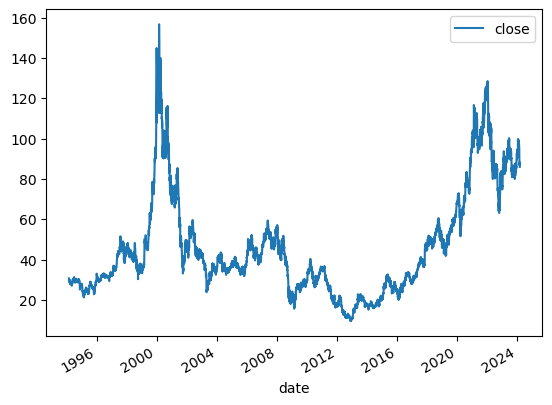

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('SONY.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,7551.000000,7551.000000,7551.000000,7551.000000,7.551000e+03
mean,46.070807,46.446597,45.681087,46.084314,9.881562e+05
std,25.889364,26.133632,25.611695,25.877754,1.195535e+06
min,9.600000,9.710000,9.570000,9.630000,5.000000e+03
25%,28.670000,28.933750,28.500000,28.687500,3.557000e+05
50%,38.040001,38.320000,37.820000,38.139999,7.132000e+05
75%,53.549999,53.875000,53.095001,53.490000,1.222400e+06
max,154.500000,157.375000,152.500000,156.750000,3.533250e+07


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
1994-02-28,30.6250,30.875,30.6250,30.7500,154800,30.3125
1994-03-01,30.5000,30.500,30.3125,30.3125,107000,29.5000
1994-03-02,29.7500,29.750,29.3750,29.5000,408600,29.3125
1994-03-03,29.4375,29.500,29.2500,29.3125,161400,29.5000
1994-03-04,29.4375,29.625,29.3750,29.5000,29600,29.4375


In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1994-02-28,30.6250,30.875,30.6250,30.7500,154800,30.3125,NaN
1994-03-01,30.5000,30.500,30.3125,30.3125,107000,29.5000,30.7500
1994-03-02,29.7500,29.750,29.3750,29.5000,408600,29.3125,30.3125
1994-03-03,29.4375,29.500,29.2500,29.3125,161400,29.5000,29.5000
1994-03-04,29.4375,29.625,29.3750,29.5000,29600,29.4375,29.3125


In [15]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

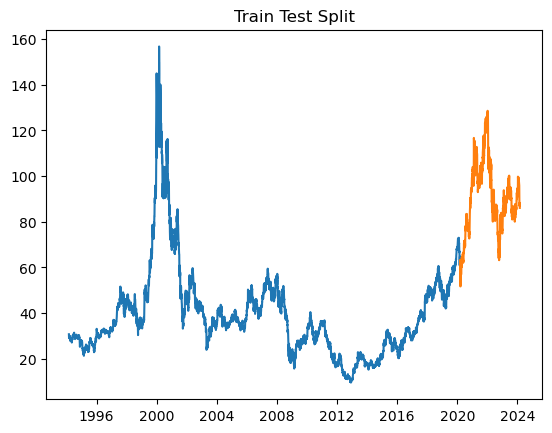

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.51
MAPE: 0.01
minae: 0.00
maxae: 4.46
medae: 0.39

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 0.73
MAPE: 0.01
minae: 0.00
maxae: 7.68
medae: 0.53

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 0.60
MAPE: 0.01
minae: 0.00
maxae: 3.59
medae: 0.48

Learning rate set to 0.358225
0:	learn: 13.2470946	total: 143ms	remaining: 14.2s
1:	learn: 9.0400515	total: 146ms	remaining: 7.15s
2:	learn: 6.1918781	total: 148ms	remaining: 4.8s
3:	learn: 4.2824622	total: 151ms	remaining: 3.62s
4:	learn: 3.0933887	total: 155ms	remaining: 2.94s
5:	learn: 2.3276885	total: 157ms	remaining: 2.46s
6:	learn: 1.8795557	total: 160ms	remaining: 2.12s
7:	learn: 1.6310910	total: 162ms	remaining: 1.86s
8:	learn: 1.4663458	total: 164ms	remaining: 1.66s
9:	learn: 1.3771866	total: 166ms	remaining: 1.5s
10:	learn: 1.2935287	total: 170ms	remaining: 

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-06,63.119999,63.872154
2020-03-09,58.529999,59.968347
2020-03-10,60.330002,60.342621
2020-03-11,57.790001,57.852237
2020-03-12,52.570000,53.446596
...,...,...
2024-02-20,87.849998,88.127041
2024-02-21,86.889999,87.808816
2024-02-22,88.320000,88.049352


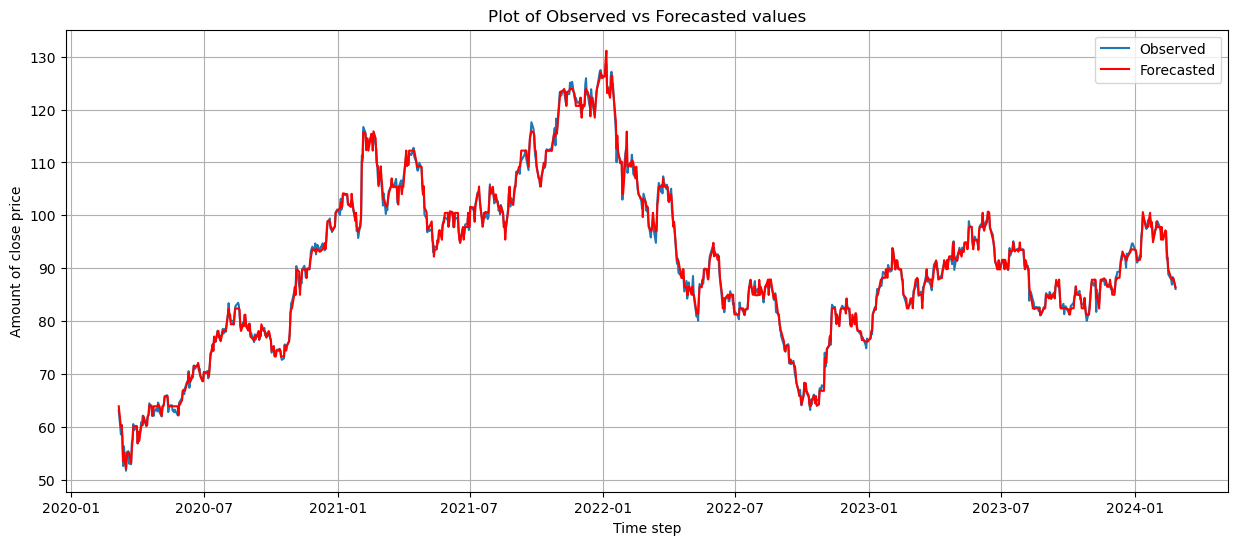

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1994-02-28,30.6250,30.875,30.6250,30.7500,154800,30.3125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-01,30.5000,30.500,30.3125,30.3125,107000,29.5000,30.7500,0.992835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-02,29.7500,29.750,29.3750,29.5000,408600,29.3125,30.3125,0.986416,61.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-03,29.4375,29.500,29.2500,29.3125,161400,29.5000,29.5000,0.996812,59.8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-04,29.4375,29.625,29.3750,29.5000,29600,29.4375,29.3125,1.003188,58.8125,0.987448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(7551, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1994-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.7500,NaN
1994-03-01,0.992835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.3125,NaN
1994-03-02,0.986416,61.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5000,NaN
1994-03-03,0.996812,59.8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.3125,NaN
1994-03-04,1.003188,58.8125,0.987448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5000,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(6551, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
1998-02-12,0.994833,91.00000,0.988499,230.15625,1.011736,2669.78125,1.050377,10732.00000,1.392395,32393.81250,45.12500,-0.021680,45.375000,45.453125,32.406531,45.680141
1998-02-13,0.994429,90.71875,0.985371,228.25000,0.998927,2676.09375,1.037881,10740.18750,1.376359,32408.18750,44.62500,-0.028571,45.114583,45.187500,32.418725,45.628670
1998-02-17,1.005917,89.75000,0.999447,226.43750,1.008808,2680.37500,1.049319,10749.06250,1.392072,32422.50000,45.15625,-0.060468,44.968750,45.125000,32.431424,45.605625
1998-02-18,0.994783,89.78125,0.992229,225.90625,0.996527,2685.71875,1.037600,10758.46875,1.376969,32438.15625,44.68750,-0.047936,44.822917,44.898438,32.443632,45.560839
1998-02-19,0.992248,89.84375,0.983927,225.18750,0.980262,2690.59375,1.020855,10767.03125,1.355179,32453.53125,44.00000,-0.077931,44.614583,44.617188,32.455131,45.484700


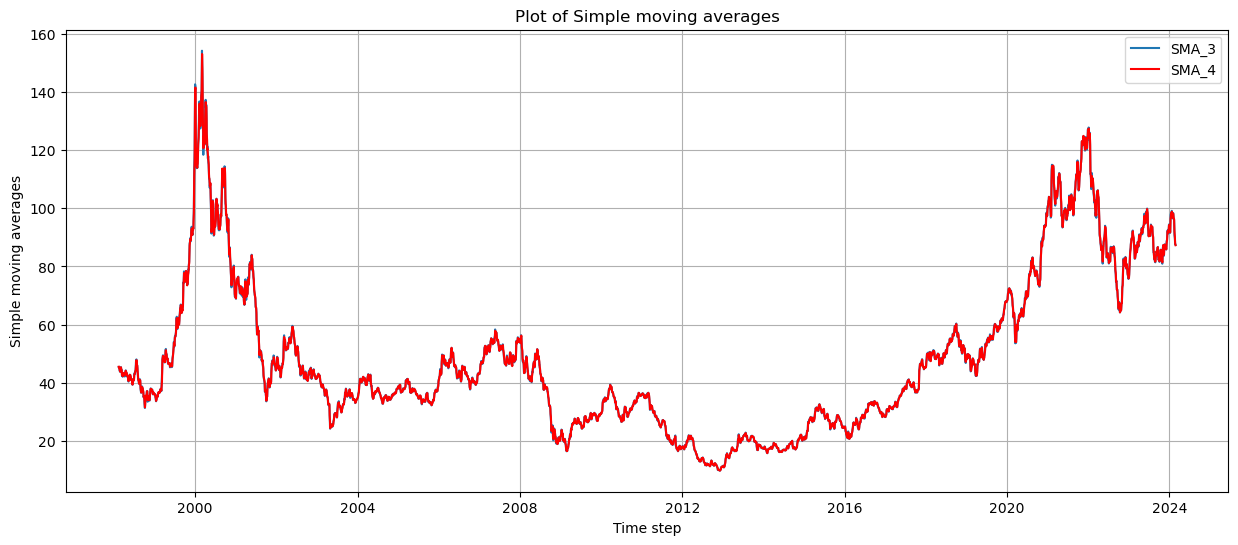

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

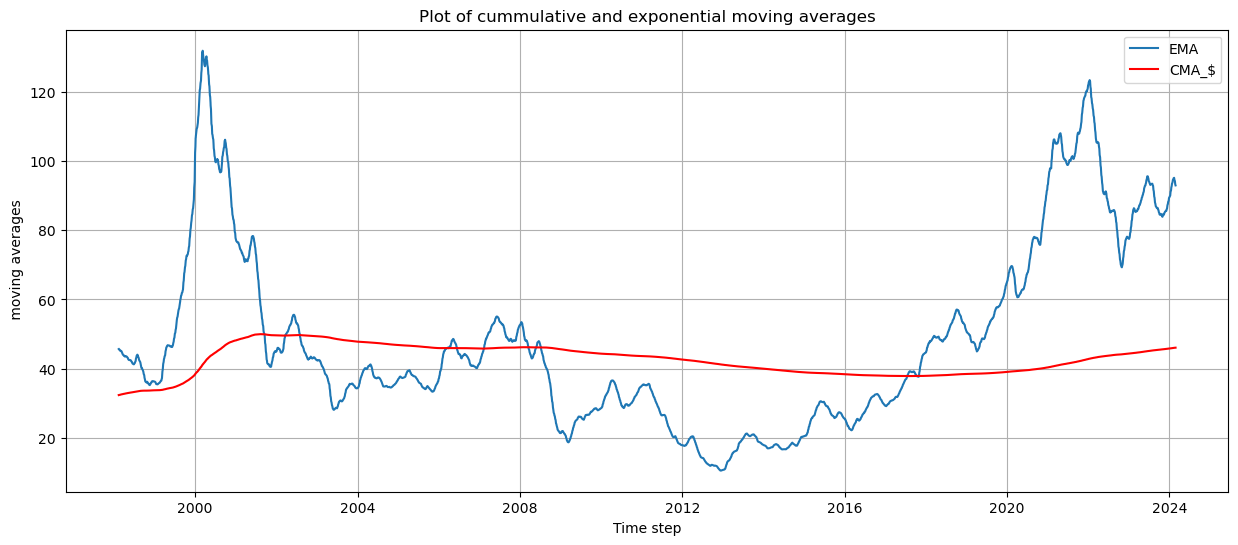

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

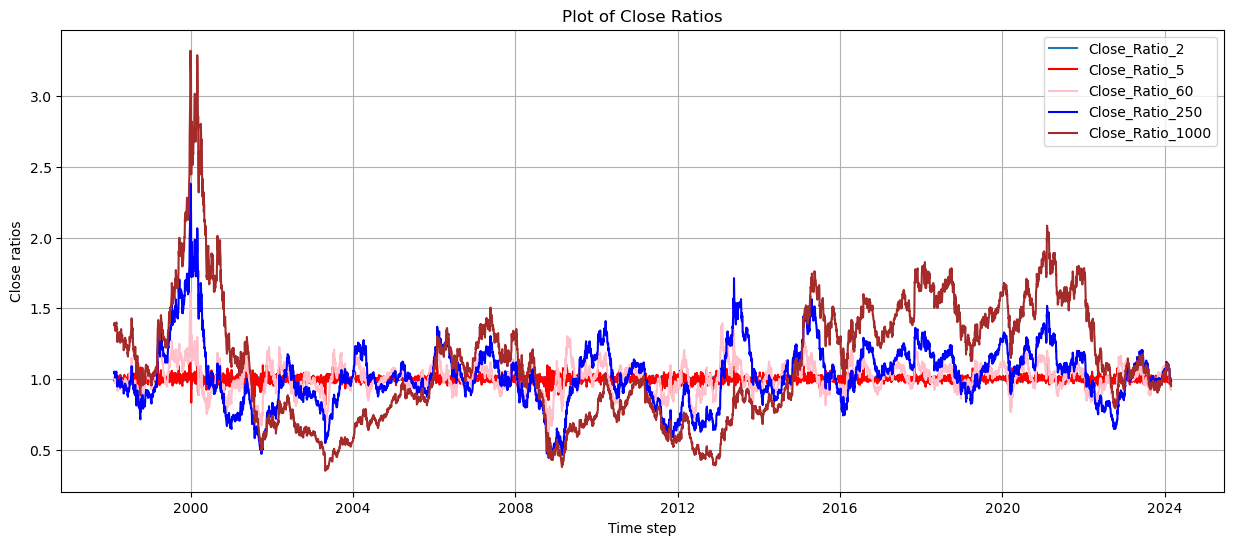

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

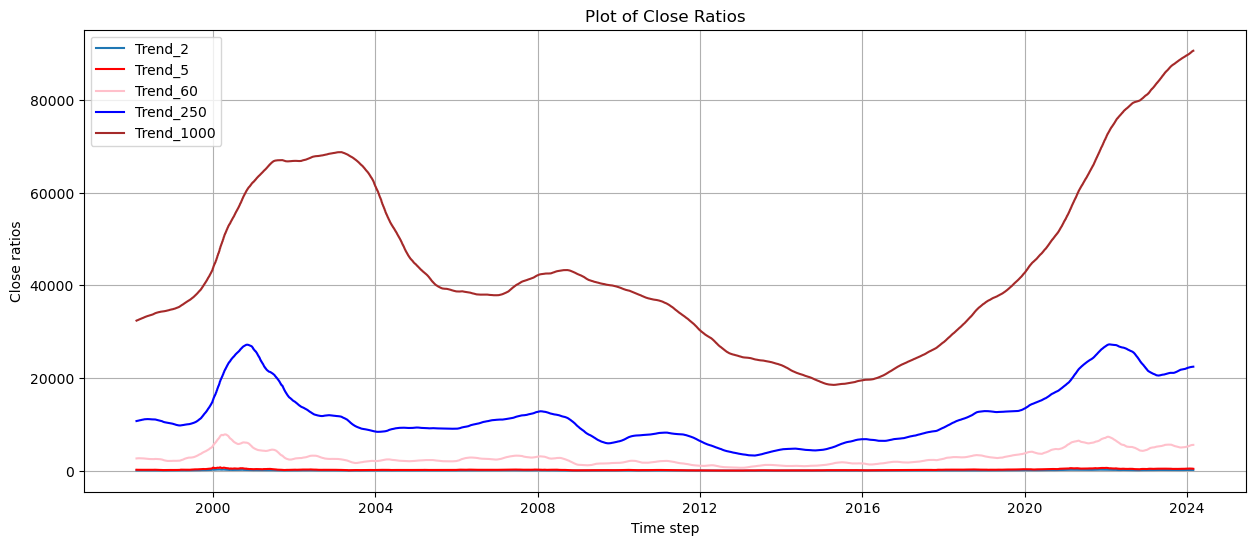

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

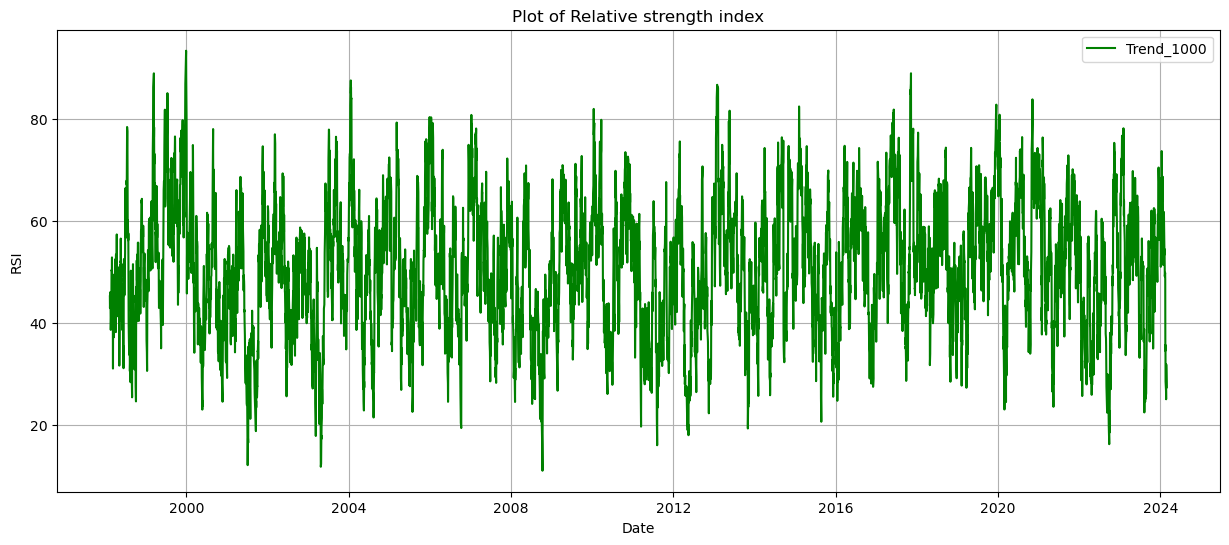

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

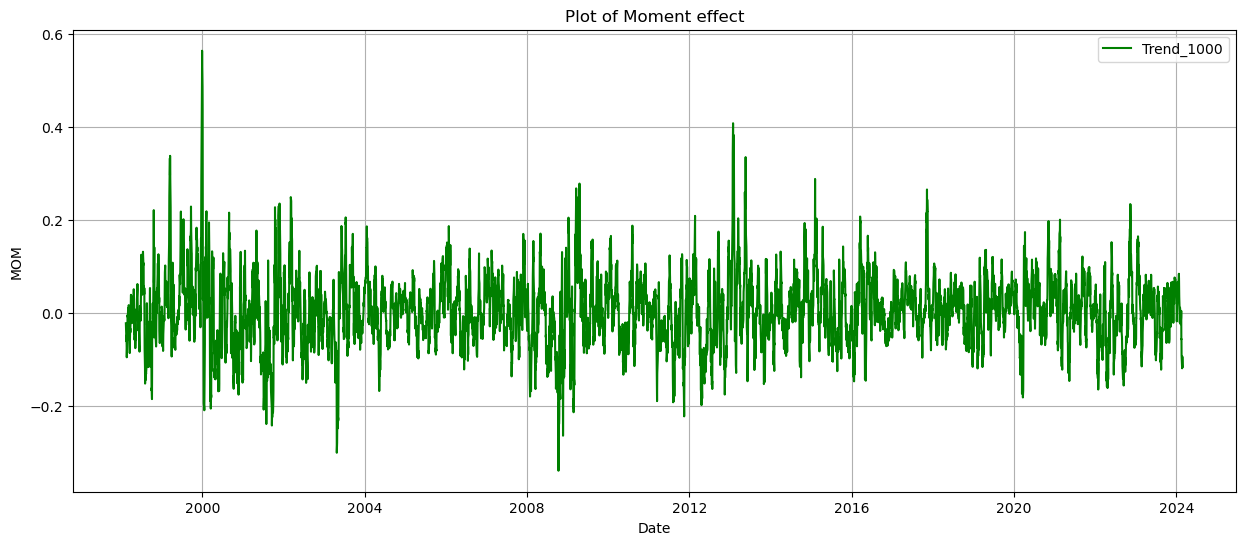

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [44]:
train.shape

(5551, 18)

In [45]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [46]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

#### Retrain the models on the new predictors

In [47]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 1.04
MAPE: 0.01
minae: 0.00
maxae: 7.86
medae: 0.81

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 1.30
MAPE: 0.01
minae: 0.00
maxae: 6.51
medae: 1.06

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 1.10
MAPE: 0.01
minae: 0.00
maxae: 7.36
medae: 0.87

Learning rate set to 0.348972
0:	learn: 14.2896951	total: 4.08ms	remaining: 404ms
1:	learn: 9.8381249	total: 7ms	remaining: 343ms
2:	learn: 6.9620151	total: 11.6ms	remaining: 376ms
3:	learn: 4.9319769	total: 15.5ms	remaining: 372ms
4:	learn: 3.6723474	total: 19.3ms	remaining: 367ms
5:	learn: 2.8598273	total: 22.5ms	remaining: 352ms
6:	learn: 2.3771566	total: 25.6ms	remaining: 340ms
7:	learn: 2.0676106	total: 28.6ms	remaining: 329ms
8:	learn: 1.8866036	total: 32ms	remaining: 324ms
9:	learn: 1.7542345	total: 37.4ms	remaining: 336ms
10:	learn: 1.6955514	total: 49.9ms	remaining: 404ms
11:	learn: 1.5971297	total: 

#### Improving the model

In [48]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [49]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [50]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [51]:
predictions_2 = backtest(new_data, model_2, predictors)

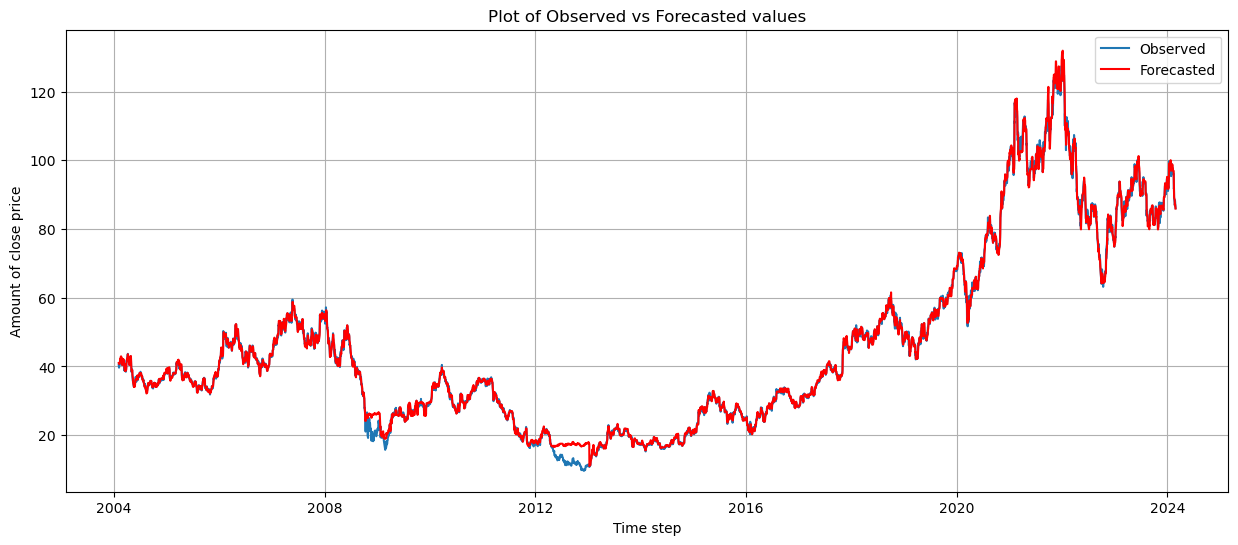

In [52]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [53]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [54]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [55]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.02028125671486872

mean absolute  error is : 1.8858654346185124



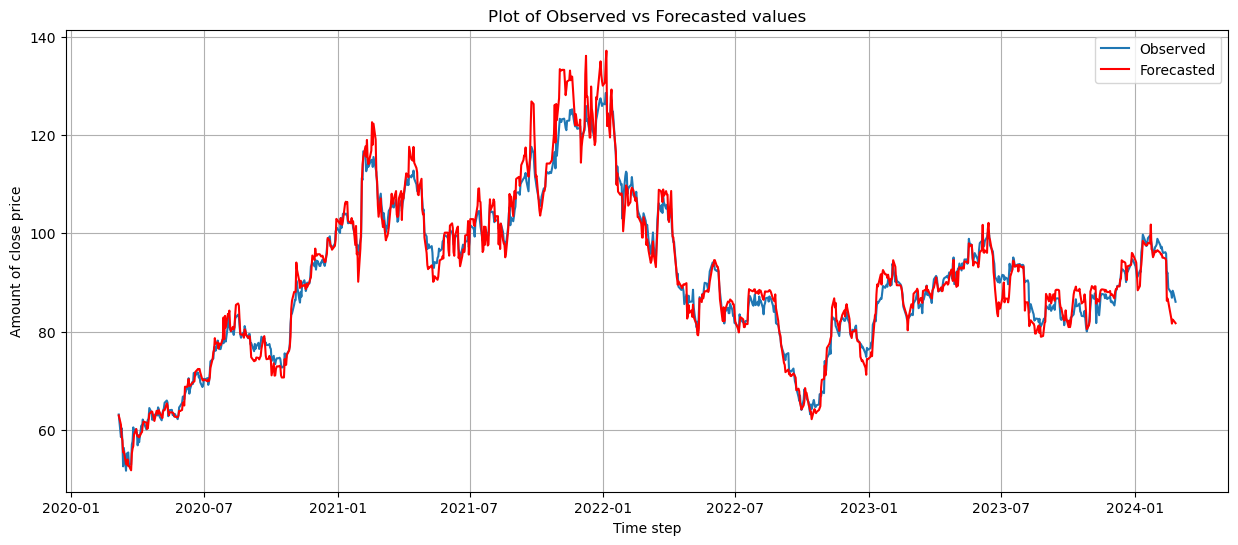

In [56]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [57]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [58]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [59]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 1.126028890676133 
 gradientboost minae: 0.001332462424102232 
 gradientboost maxae: 7.015585967233278 
 gradientboost medae: 0.8567301786398289 
 gradientboost Mape: 0.01213833501557868 
  

 <-------------------------------------------------->



In [60]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-06,63.119999,63.706745
2020-03-09,58.529999,60.408939
2020-03-10,60.330002,60.618846
2020-03-11,57.790001,58.554190
2020-03-12,52.570000,55.964755
...,...,...
2024-02-20,87.849998,87.091593
2024-02-21,86.889999,85.752799
2024-02-22,88.320000,85.499022


In [61]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [62]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.01213833501557868

mean absolute  error is : 1.126028890676133



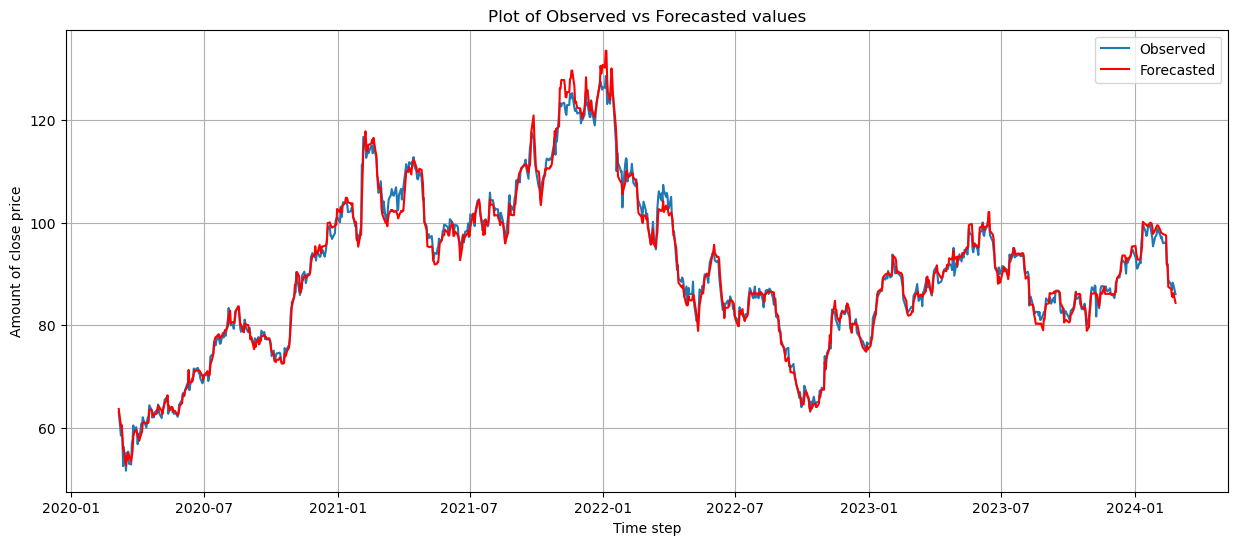

In [63]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [64]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 1.1105812455999997 
 bagging minae: 0.0012499999999988631 
 bagging maxae: 7.591247999999993 
 bagging medae: 0.8322483000000034 
 bagging Mape: 0.01210816863542684 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.8512694777688078 
 stacking minae: 0.000772697351820284 
 stacking maxae: 5.006822540755721 
 stacking medae: 0.7028717094376091 
 stacking mape: 0.00948977720459798 



In [65]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [66]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [67]:
combined_bagg.head()

,close,0
date,,
2020-03-06,63.119999,63.668624
2020-03-09,58.529999,61.120001
2020-03-10,60.330002,59.293501
2020-03-11,57.790001,58.650999
2020-03-12,52.570000,57.144001


In [68]:
combined_stack

,close,0
date,,
2020-03-06,63.119999,64.572850
2020-03-09,58.529999,59.458209
2020-03-10,60.330002,61.509735
2020-03-11,57.790001,56.262642
2020-03-12,52.570000,55.525328
...,...,...
2024-02-20,87.849998,89.280967
2024-02-21,86.889999,86.240702
2024-02-22,88.320000,88.042742


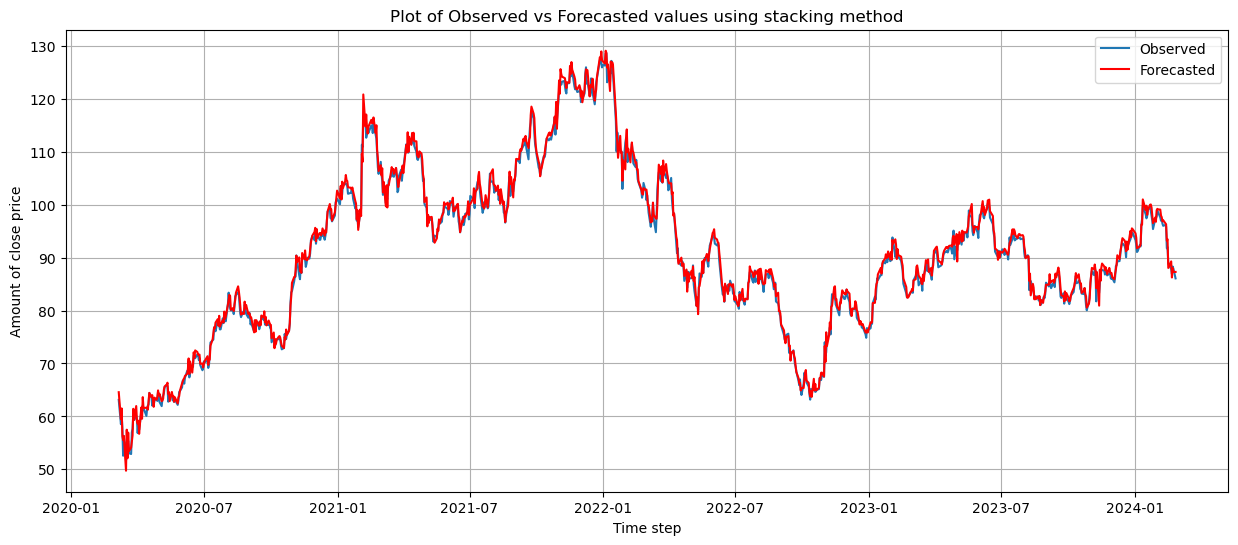

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

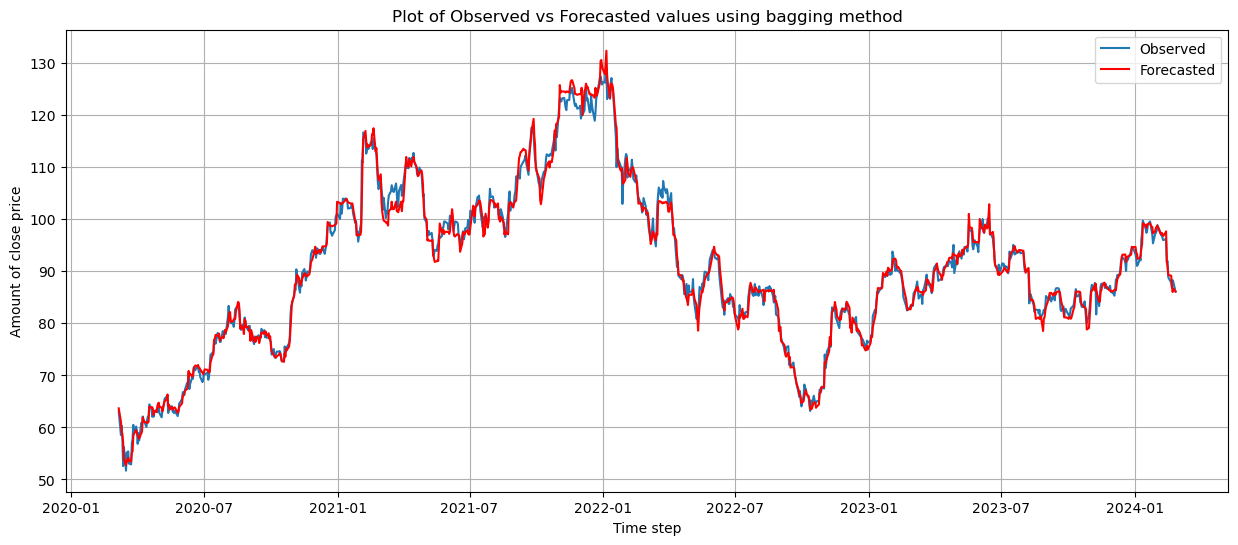

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

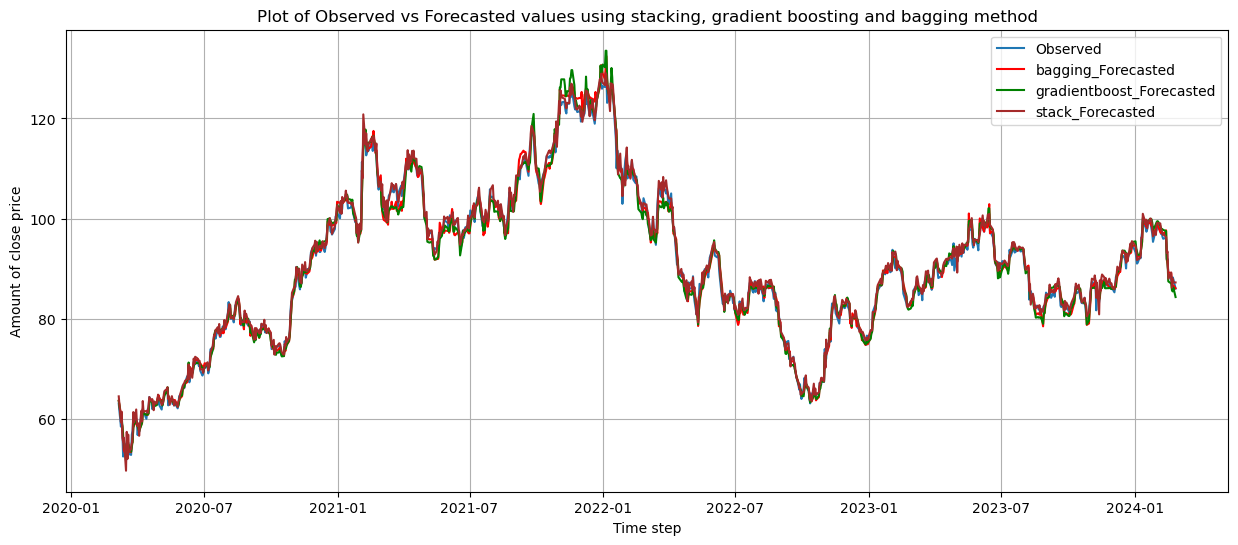

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('SONYresult.png')
plt.show()

In [72]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 1.04, 0.01, 0.00, 7.86, 0.81])
task1_result.add_row(['XGboost', 1.30, 0.01, 0.00, 6.51, 1.06])
task1_result.add_row(['GradientBoost', 1.10, 0.01, 0.00, 7.36, 0.87])
task1_result.add_row(['Catboost', 1.89, 0.02, 0.00, 10.48, 1.48])
task1_result.add_row(['Bagging', 1.11, 0.12, 0.00, 7.59, 0.83])
task1_result.add_row(['Stacking', 0.82, 0.01, 0.00, 4.95, 0.69])

print('Result Summary for All Regressors :')
print(task1_result) 

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     1.04    |     0.01     |      0.0      |      7.86     |      0.81     |
|    XGboost    |     1.3     |     0.01     |      0.0      |      6.51     |      1.06     |
| GradientBoost |     1.1     |     0.01     |      0.0      |      7.36     |      0.87     |
|    Catboost   |     1.89    |     0.02     |      0.0      |     10.48     |      1.48     |
|    Bagging    |     1.11    |     0.12     |      0.0      |      7.59     |      0.83     |
|    Stacking   |     0.82    |     0.01     |      0.0      |      4.95     |      0.69     |
+---------------+-------------+--------------+---------------+---------------+---------------+
